1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [12]:
# Generation of the dataset
N = 1000
x1= np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
dataset = np.array([x1,x2,x3])

#Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(dataset)
l, V = la.eig(cov)
#Take only the real component
l = np.real_if_close(l)
print ("Eigenvalues : " ,l)
print ("Eigenvectors : \n",V)

#Eigenvectors and eigenvalues using the SVD
print("\nEigenvectors and eigenvalues using the SVD :")
U, S, Vt = np.linalg.svd(dataset)
l_svd = S**2/(N-1)
V_svd = U
print ("Eigenvalues : " ,l_svd)
print ("Eigenvectors :\n",V_svd)

'''There is a small difference between the two procedures'''

Eigenvalues :  [2.69641787e+01 3.92032701e-16 1.87353423e+00]
Eigenvectors : 
 [[-0.10923859 -0.81649658  0.56692174]
 [-0.58509591 -0.40824829 -0.70071114]
 [-0.80357309  0.40824829  0.43313234]]

Eigenvectors and eigenvalues using the SVD :
Eigenvalues :  [2.70689858e+01 1.87870289e+00 5.24562239e-32]
Eigenvectors :
 [[-0.10871369  0.56702263 -0.81649658]
 [-0.58574437 -0.70016917 -0.40824829]
 [-0.80317175  0.4338761   0.40824829]]


'There is a small difference between the two procedures'

In [16]:
Lambda = np.diag(l)
trace = Lambda.trace()
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", trace, '\n')
print("Total variability:\n", (Lambda[0,0]/Lambda.trace()), '\n')

#Redefine the data
dataset_2 = np.dot(V.T, dataset)

Lambda:
 [[2.69641787e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.92032701e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.87353423e+00]] 

Trace(A):
 28.83771293982859 

Trace(Lambda):
 28.83771293982859 

Total variability:
 0.9350318025185216 



Text(0, 0.5, 'x3')

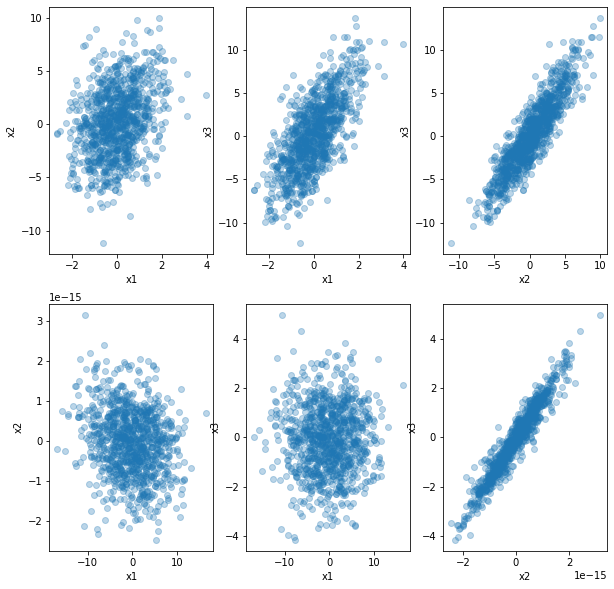

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

ax[0,0].scatter(dataset[0,:], dataset[1, :], alpha=0.3)
ax[0,0].set_xlabel("x1")
ax[0,0].set_ylabel("x2")

ax[0,1].scatter(dataset[0,:], dataset[2, :], alpha=0.3)
ax[0,1].set_xlabel("x1")
ax[0,1].set_ylabel("x3")

ax[0,2].scatter(dataset[1,:], dataset[2, :], alpha=0.3)
ax[0,2].set_xlabel("x2")
ax[0,2].set_ylabel("x3")

ax[1,0].scatter(dataset_2[0,:], dataset_2[1, :], alpha=0.3)
ax[1,0].set_xlabel("x1")
ax[1,0].set_ylabel("x2")

ax[1,1].scatter(dataset_2[0,:], dataset_2[2, :], alpha=0.3)
ax[1,1].set_xlabel("x1")
ax[1,1].set_ylabel("x3")

ax[1,2].scatter(dataset_2[1,:], dataset_2[2, :], alpha=0.3)
ax[1,2].set_xlabel("x2")
ax[1,2].set_ylabel("x3")

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [23]:
new_var = np.random.normal(0, scale=1/20, size=(3, N, 10))
new_var_sum = np.sum(new_var, axis=2)

dataset_3 = dataset + new_var_sum
cov = np.cov(dataset_3)
l, V = la.eig(cov)
l = np.real_if_close(l)

print ("Eigenvalues : " ,l)
print ("Eigenvectors : \n",V)

Lambda = np.diag(l)
trace = Lambda.trace()

print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", trace, '\n')
print("Total variability:\n", (Lambda[0,0]/Lambda.trace()), '\n')

dataset_4 = np.dot(V.T, dataset_3)

Eigenvalues :  [2.69692145e+01 2.45168067e-02 1.87988491e+00]
Eigenvectors : 
 [[-0.10912547 -0.8178641   0.56496898]
 [-0.5836119  -0.40737576 -0.70245437]
 [-0.80466688  0.40637828  0.43286015]]
Lambda:
 [[2.69692145e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.45168067e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.87988491e+00]] 

Trace(A):
 28.873616200936276 

Trace(Lambda):
 28.87361620093628 

Total variability:
 0.9340435330552292 



Text(0, 0.5, 'x3')

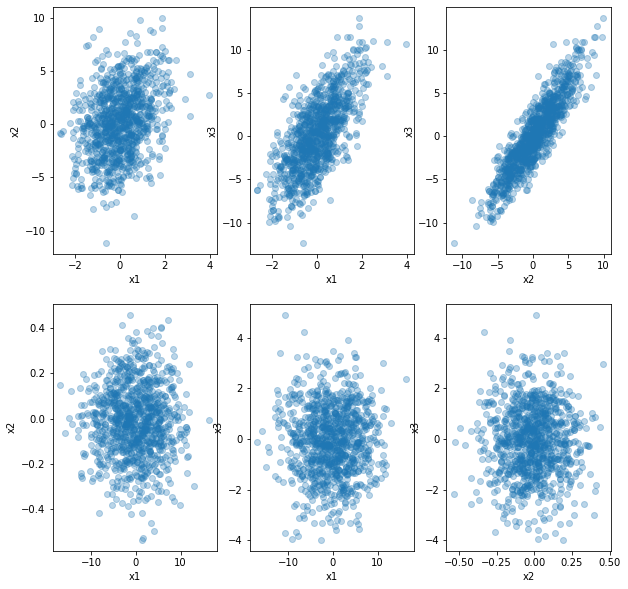

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

ax[0,0].scatter(dataset[0,:], dataset[1,:], alpha=0.3)
ax[0,0].set_xlabel("x1")
ax[0,0].set_ylabel("x2")

ax[0,1].scatter(dataset[0,:], dataset[2,:], alpha=0.3)
ax[0,1].set_xlabel("x1")
ax[0,1].set_ylabel("x3")

ax[0,2].scatter(dataset[1,:], dataset[2,:], alpha=0.3)
ax[0,2].set_xlabel("x2")
ax[0,2].set_ylabel("x3")

ax[1,0].scatter(dataset_4[0,:], dataset_4[1,:], alpha=0.3)
ax[1,0].set_xlabel("x1")
ax[1,0].set_ylabel("x2")

ax[1,1].scatter(dataset_4[0,:], dataset_4[2,:], alpha=0.3)
ax[1,1].set_xlabel("x1")
ax[1,1].set_ylabel("x3")

ax[1,2].scatter(dataset_4[1,:], dataset_4[2,:], alpha=0.3)
ax[1,2].set_xlabel("x2")
ax[1,2].set_ylabel("x3")

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 